In [223]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 999)

In [168]:
data_path = "C:/Users/armcl/Python/Springboard_Cap1/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone1/Data/" #Work

In [169]:
#Read cleaned redfin and airbnb data
redfin = pd.read_csv(data_path + "redfin_clean_scc.csv")
airbnb = pd.read_csv(data_path + "airbnb_clean_scc.csv")

In [142]:
redfin.head(3)

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,QUARTER,Q_1,Q_2,Q_3,Q_4,TOTAL SIZE,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_FACEBOOK,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,Percentage Standard Met and Above,Violent_Crime,Property_Crime
0,July-2-2019,Single Family Residential,SANTA CLARA,95054,1050000.0,3.0,2.0,1097.0,6242.0,1961.0,117.0,37.389165,-121.947778,3,0,0,1,0,7339.0,300,7.831138,6.021112,5.013714,12.849711,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0
1,April-19-2018,Condo/Co-op,SANTA CLARA,95054,882000.0,1.0,1.0,865.0,865.0,2005.0,383.0,37.396173,-121.943140,2,0,1,0,0,1730.0,300,7.952171,6.533607,5.545432,12.830049,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0
2,October-20-2017,Condo/Co-op,SANTA CLARA,95054,680000.0,1.0,1.0,900.0,900.0,2005.0,390.0,37.396330,-121.943234,4,0,0,0,1,1800.0,300,7.944713,6.537169,5.550320,12.820348,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0


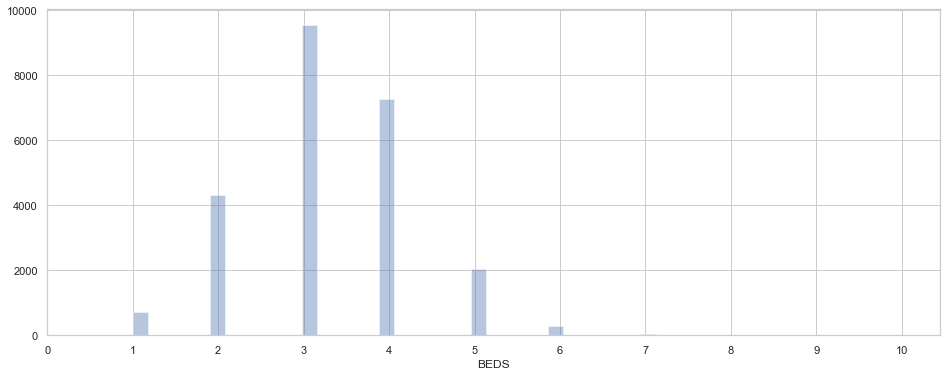

In [143]:
#Distribution of # of beds
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['BEDS'], kde=False)
plt.xticks(np.arange(0, 11, step=1))
plt.show()

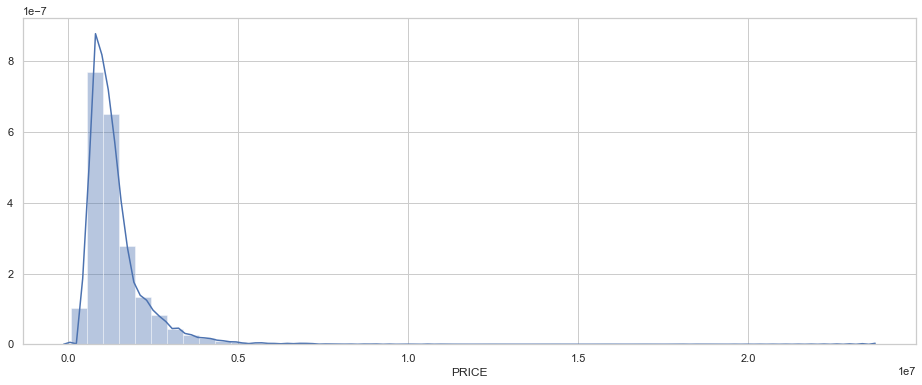

In [144]:
#Plot the distribution of price
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['PRICE'])
plt.show()

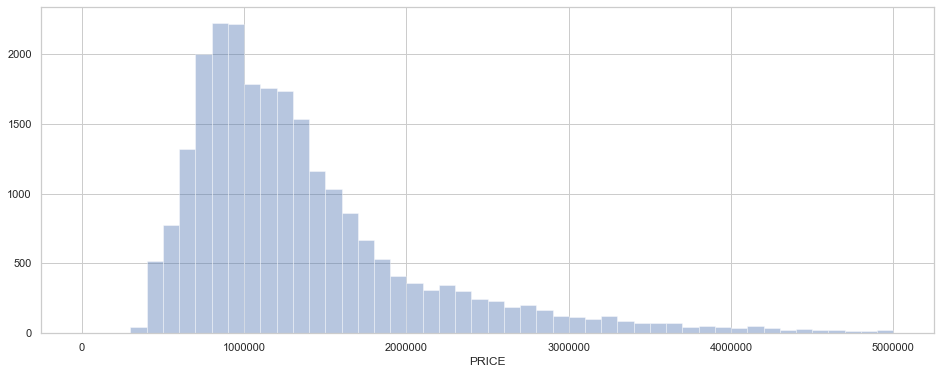

In [145]:
#Plot the distribution of price from 0 to 500K
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['PRICE'], kde=False, hist_kws={"range": [0, 5000000]})
plt.show()

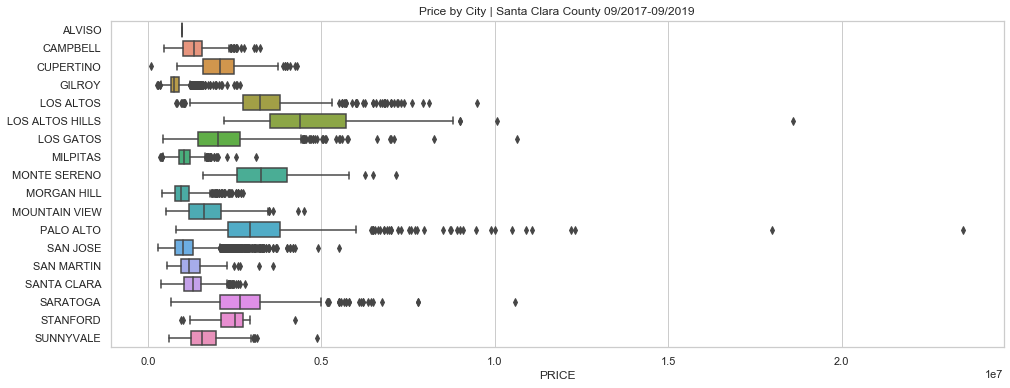

In [192]:
#Price by city
#Cities with >$5mm houses tend to be Los Altos, Los Altos Hills, Los Gatos, Palo Alto, and Saratoga
plt.figure(figsize=(16, 6))
redfin = redfin.sort_values(by=['CITY'])
ax = sns.boxplot(x="PRICE", y="CITY", orient="h", data=redfin)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Price by City | Santa Clara County 09/2017-09/2019")
ax.set_ylabel('')

plt.show()

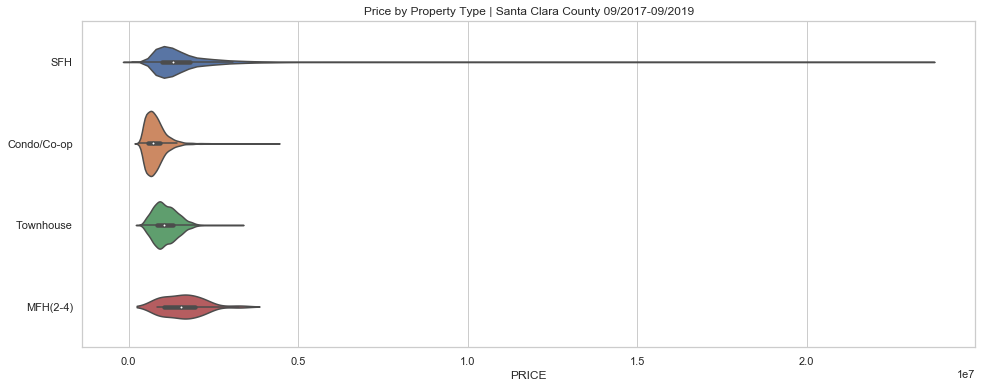

In [155]:
#Price by property type
#SFH has long tails, condo has lowest median price and MFH highest
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="PRICE", y="PROPERTY TYPE", orient="h", data=redfin)
ax.set_title("Price by Property Type | Santa Clara County 09/2017-09/2019")
ax.set_ylabel('')

plt.show()

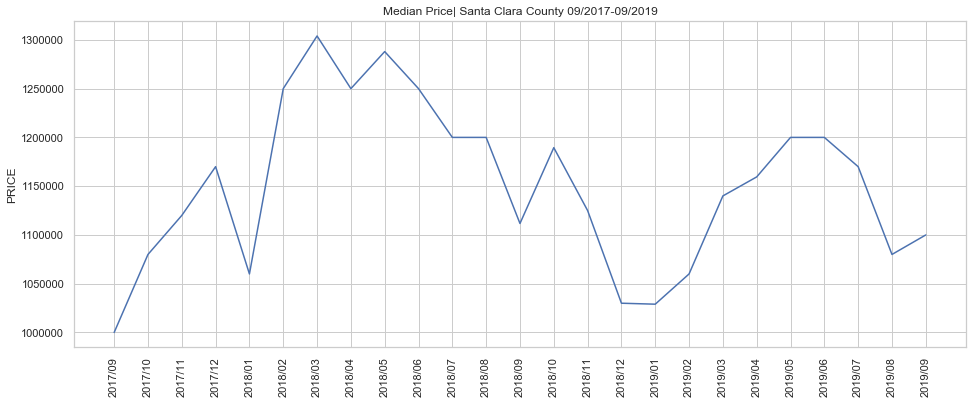

In [151]:
#House price trend in the last 2 years
#It rose to the highest in Q2/2018 and dropped like a rock; then came back in Q2/2019 and 
#dropped again in Q3. There's both cyclical trend and time series trend

redfin['Date'] = pd.to_datetime(redfin['SOLD DATE']).dt.strftime('%Y/%m')
#redfin
redfin = redfin.sort_values(by=['Date'])
redfin_median = redfin.groupby('Date').median()

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=redfin_median.index, y="PRICE", data=redfin_median)
plt.xticks(plt.xticks()[0], redfin_median.index, rotation=90)
ax.set_xlabel('')
ax.set_title("Median Price| Santa Clara County 09/2017-09/2019")
#plt.tight_layout()
plt.show()

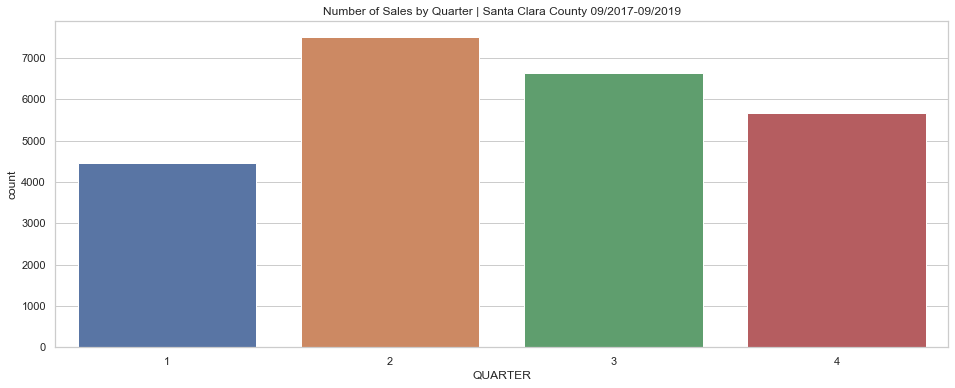

In [152]:
#Hypothesis: more sales in spring and summer
#Count the num of sales in each quarter. Surprisingly Q1 is less than Q4！
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="QUARTER", data=redfin)
ax.set_title("Number of Sales by Quarter | Santa Clara County 09/2017-09/2019")
plt.show()

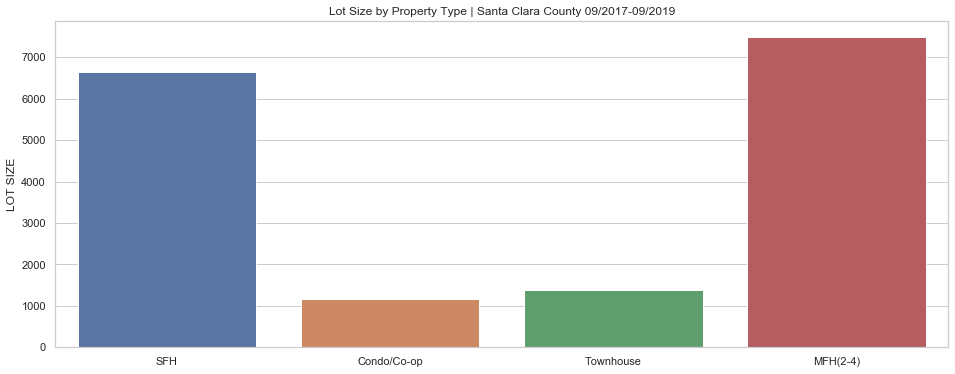

In [153]:
#Hypothesis: Condo/Townhouse have smaller lot size

redfin['PROPERTY TYPE'].replace({'Single Family Residential':'SFH', 
                                 'Multi-Family (2-4 Unit)':'MFH(2-4)'}, inplace=True)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="PROPERTY TYPE", y="LOT SIZE", data=redfin, estimator=median, ci=None)
ax.set_title("Lot Size by Property Type | Santa Clara County 09/2017-09/2019")
ax.set_xlabel('')
plt.show()

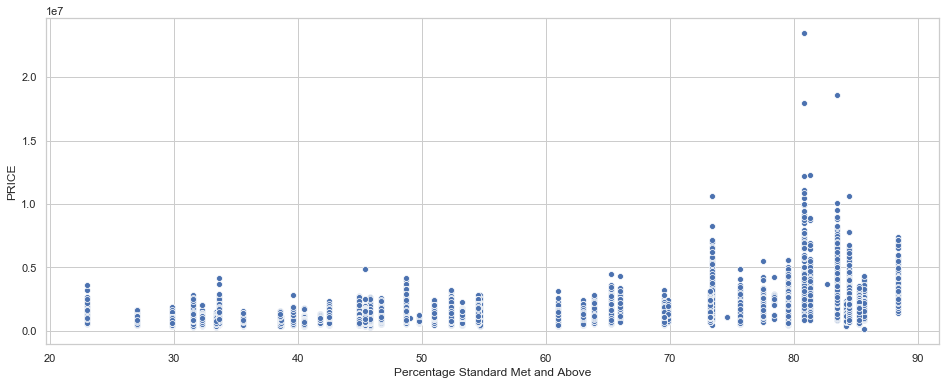

In [160]:
#Hypothese: Better schools, higher price
#The schools data are by zipcodes that's why the vertial dots
#Seems there's overall a positive relationship but not much trend when scores < 50
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Percentage Standard Met and Above", y="PRICE", data=redfin)
plt.show()

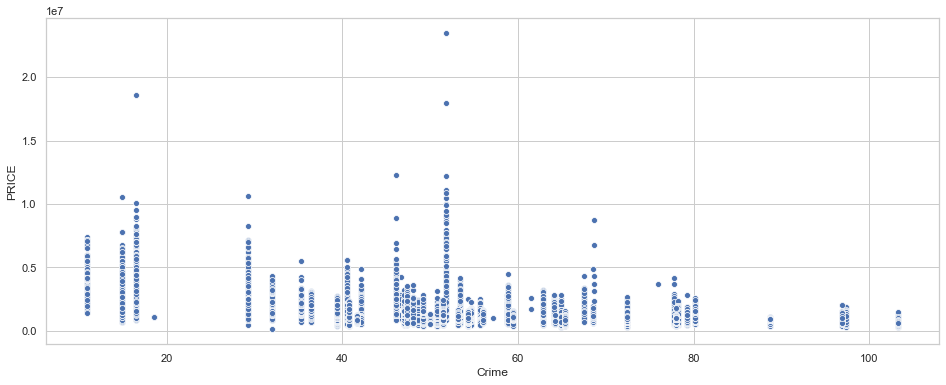

In [170]:
#Hypothese: Lower crimes, higher price
#The crime data are by zipcodes that's why the vertial dots
#Seems when crime is moderate to low (<50) no one cares, but negatively affact price when it
#gets higher (extremely high crime areas)
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Crime", y="PRICE", data=redfin)
plt.show()

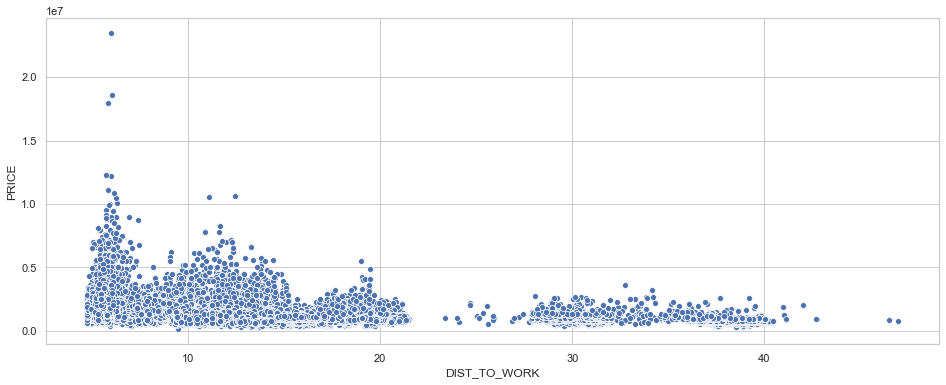

In [179]:
#Hypothese: closer to landmarks, higher price
#Generally it's true, although with some humps (deals?)
#When miles is > 20 it doesn't matter much
redfin['DIST_TO_WORK'] = (redfin['DIST_TO_OLD_APPLE'] + redfin['DIST_TO_NEW_APPLE'] + 
                          redfin['DIST_TO_GOOGLE'] + redfin['DIST_TO_SV_STATION'] +
                          redfin['DIST_TO_FACEBOOK'] + redfin['DIST_TO_PA_STATION'])/6
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="DIST_TO_WORK", y="PRICE", data=redfin)
plt.show()

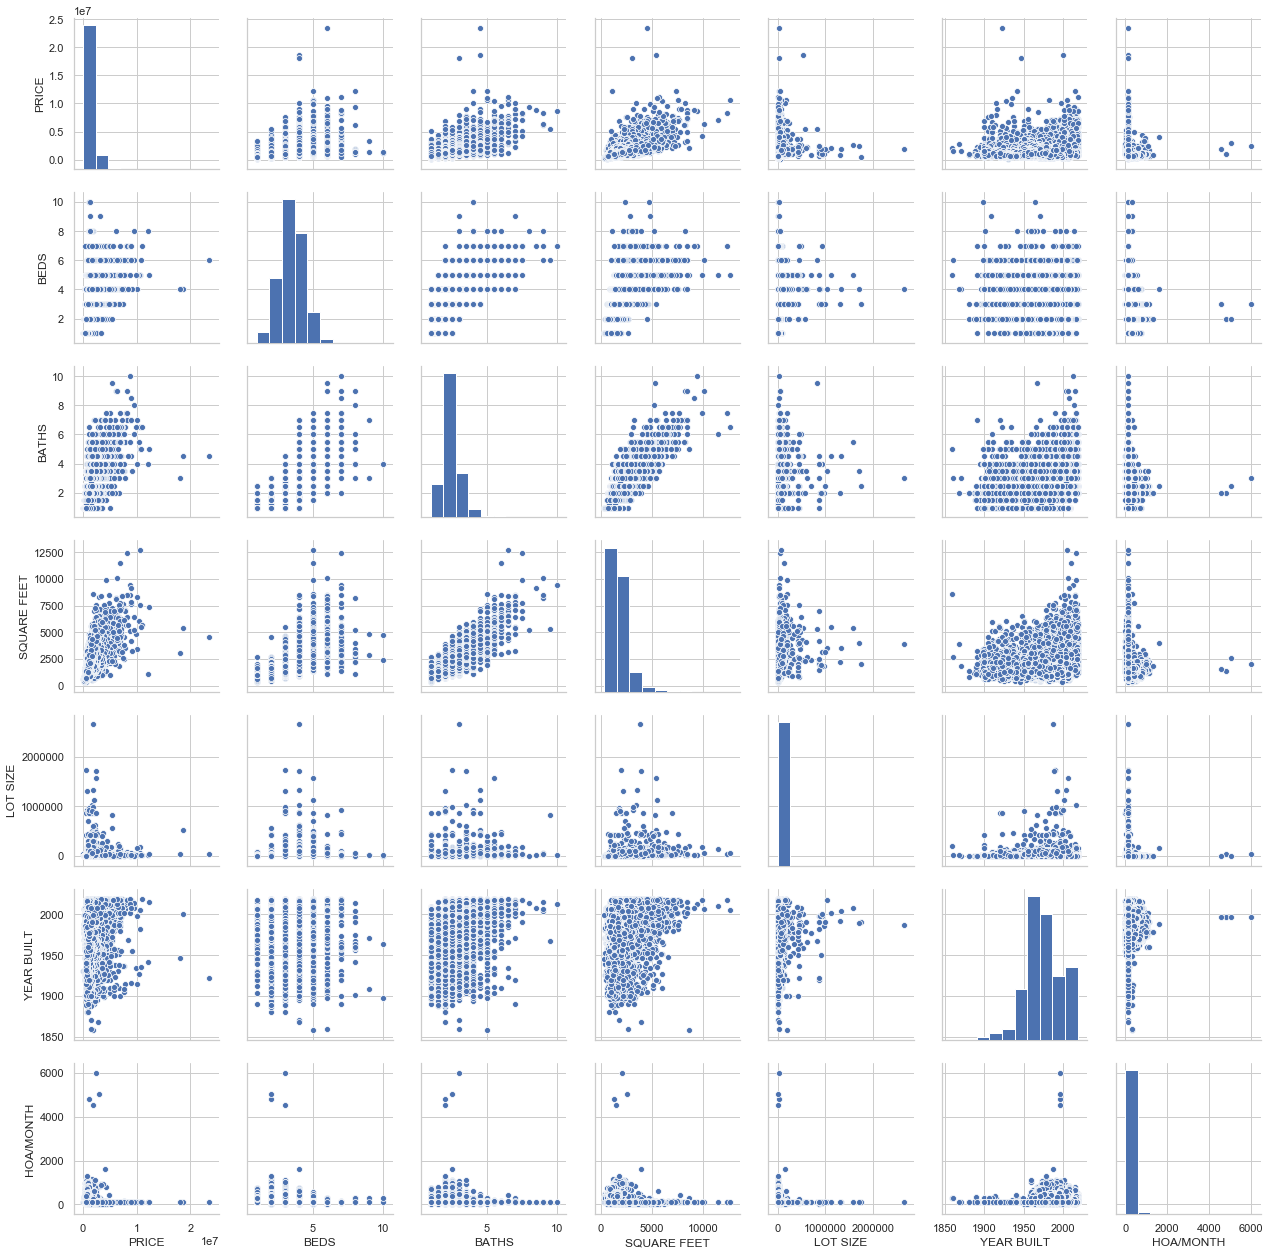

In [189]:
#pair plot essential features and price
#Square feet and year built seem to be positively related to price
#LOT SIZE exhibits negative relationship which is interesting
#When beds<5, it's positive relationship but after 5 it's negative probably because those
#houses are in surbubs really far away from work

redfin_essential = redfin[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
                           'YEAR BUILT', 'HOA/MONTH']]

g = sns.pairplot(redfin_essential)

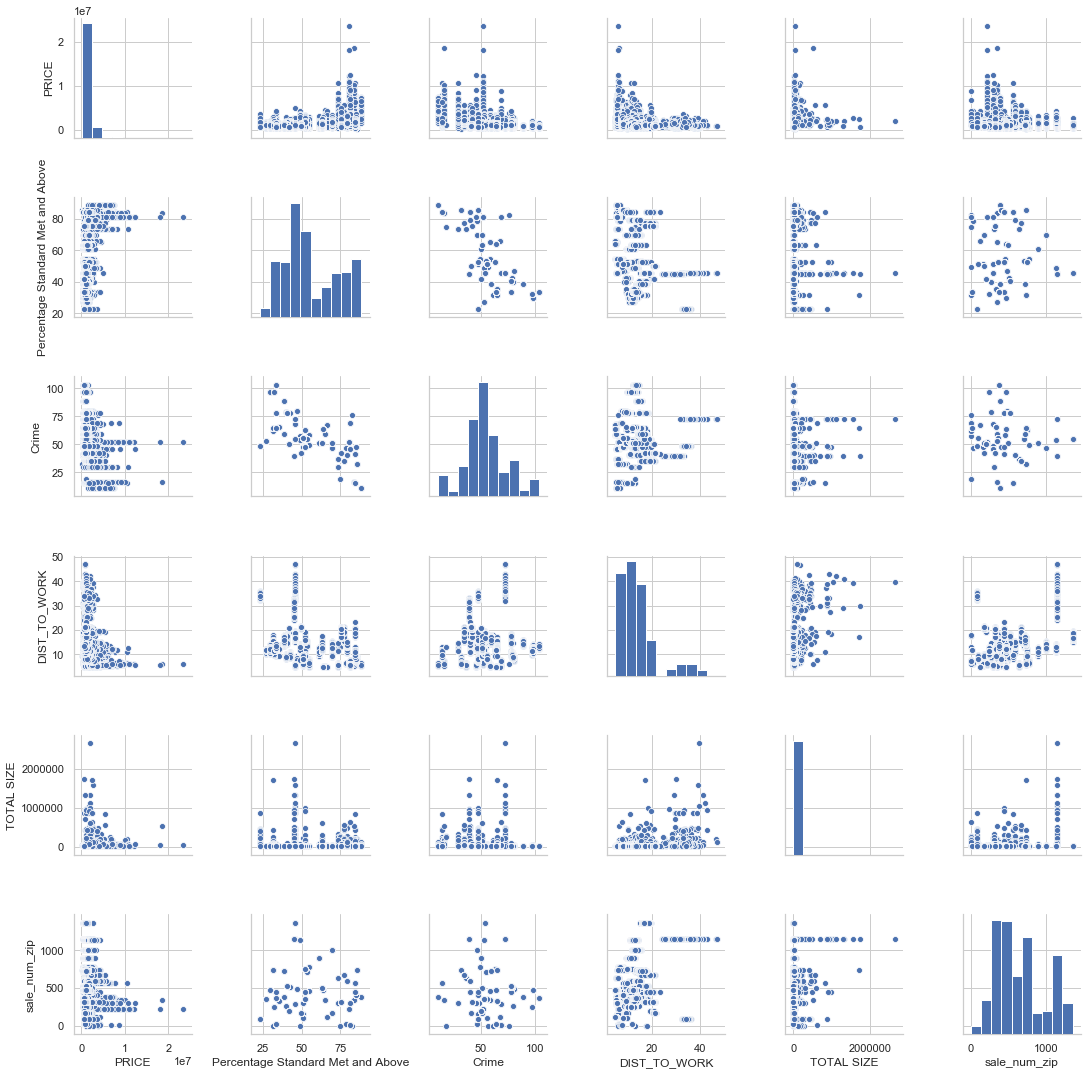

In [187]:
#pair plot added-on features and price
#Seems school, crime, and distance are important features

redfin_added = redfin[['PRICE', 'Percentage Standard Met and Above', 'Crime', 'DIST_TO_WORK',
                          'TOTAL SIZE', 'sale_num_zip']]

g = sns.pairplot(redfin_added)

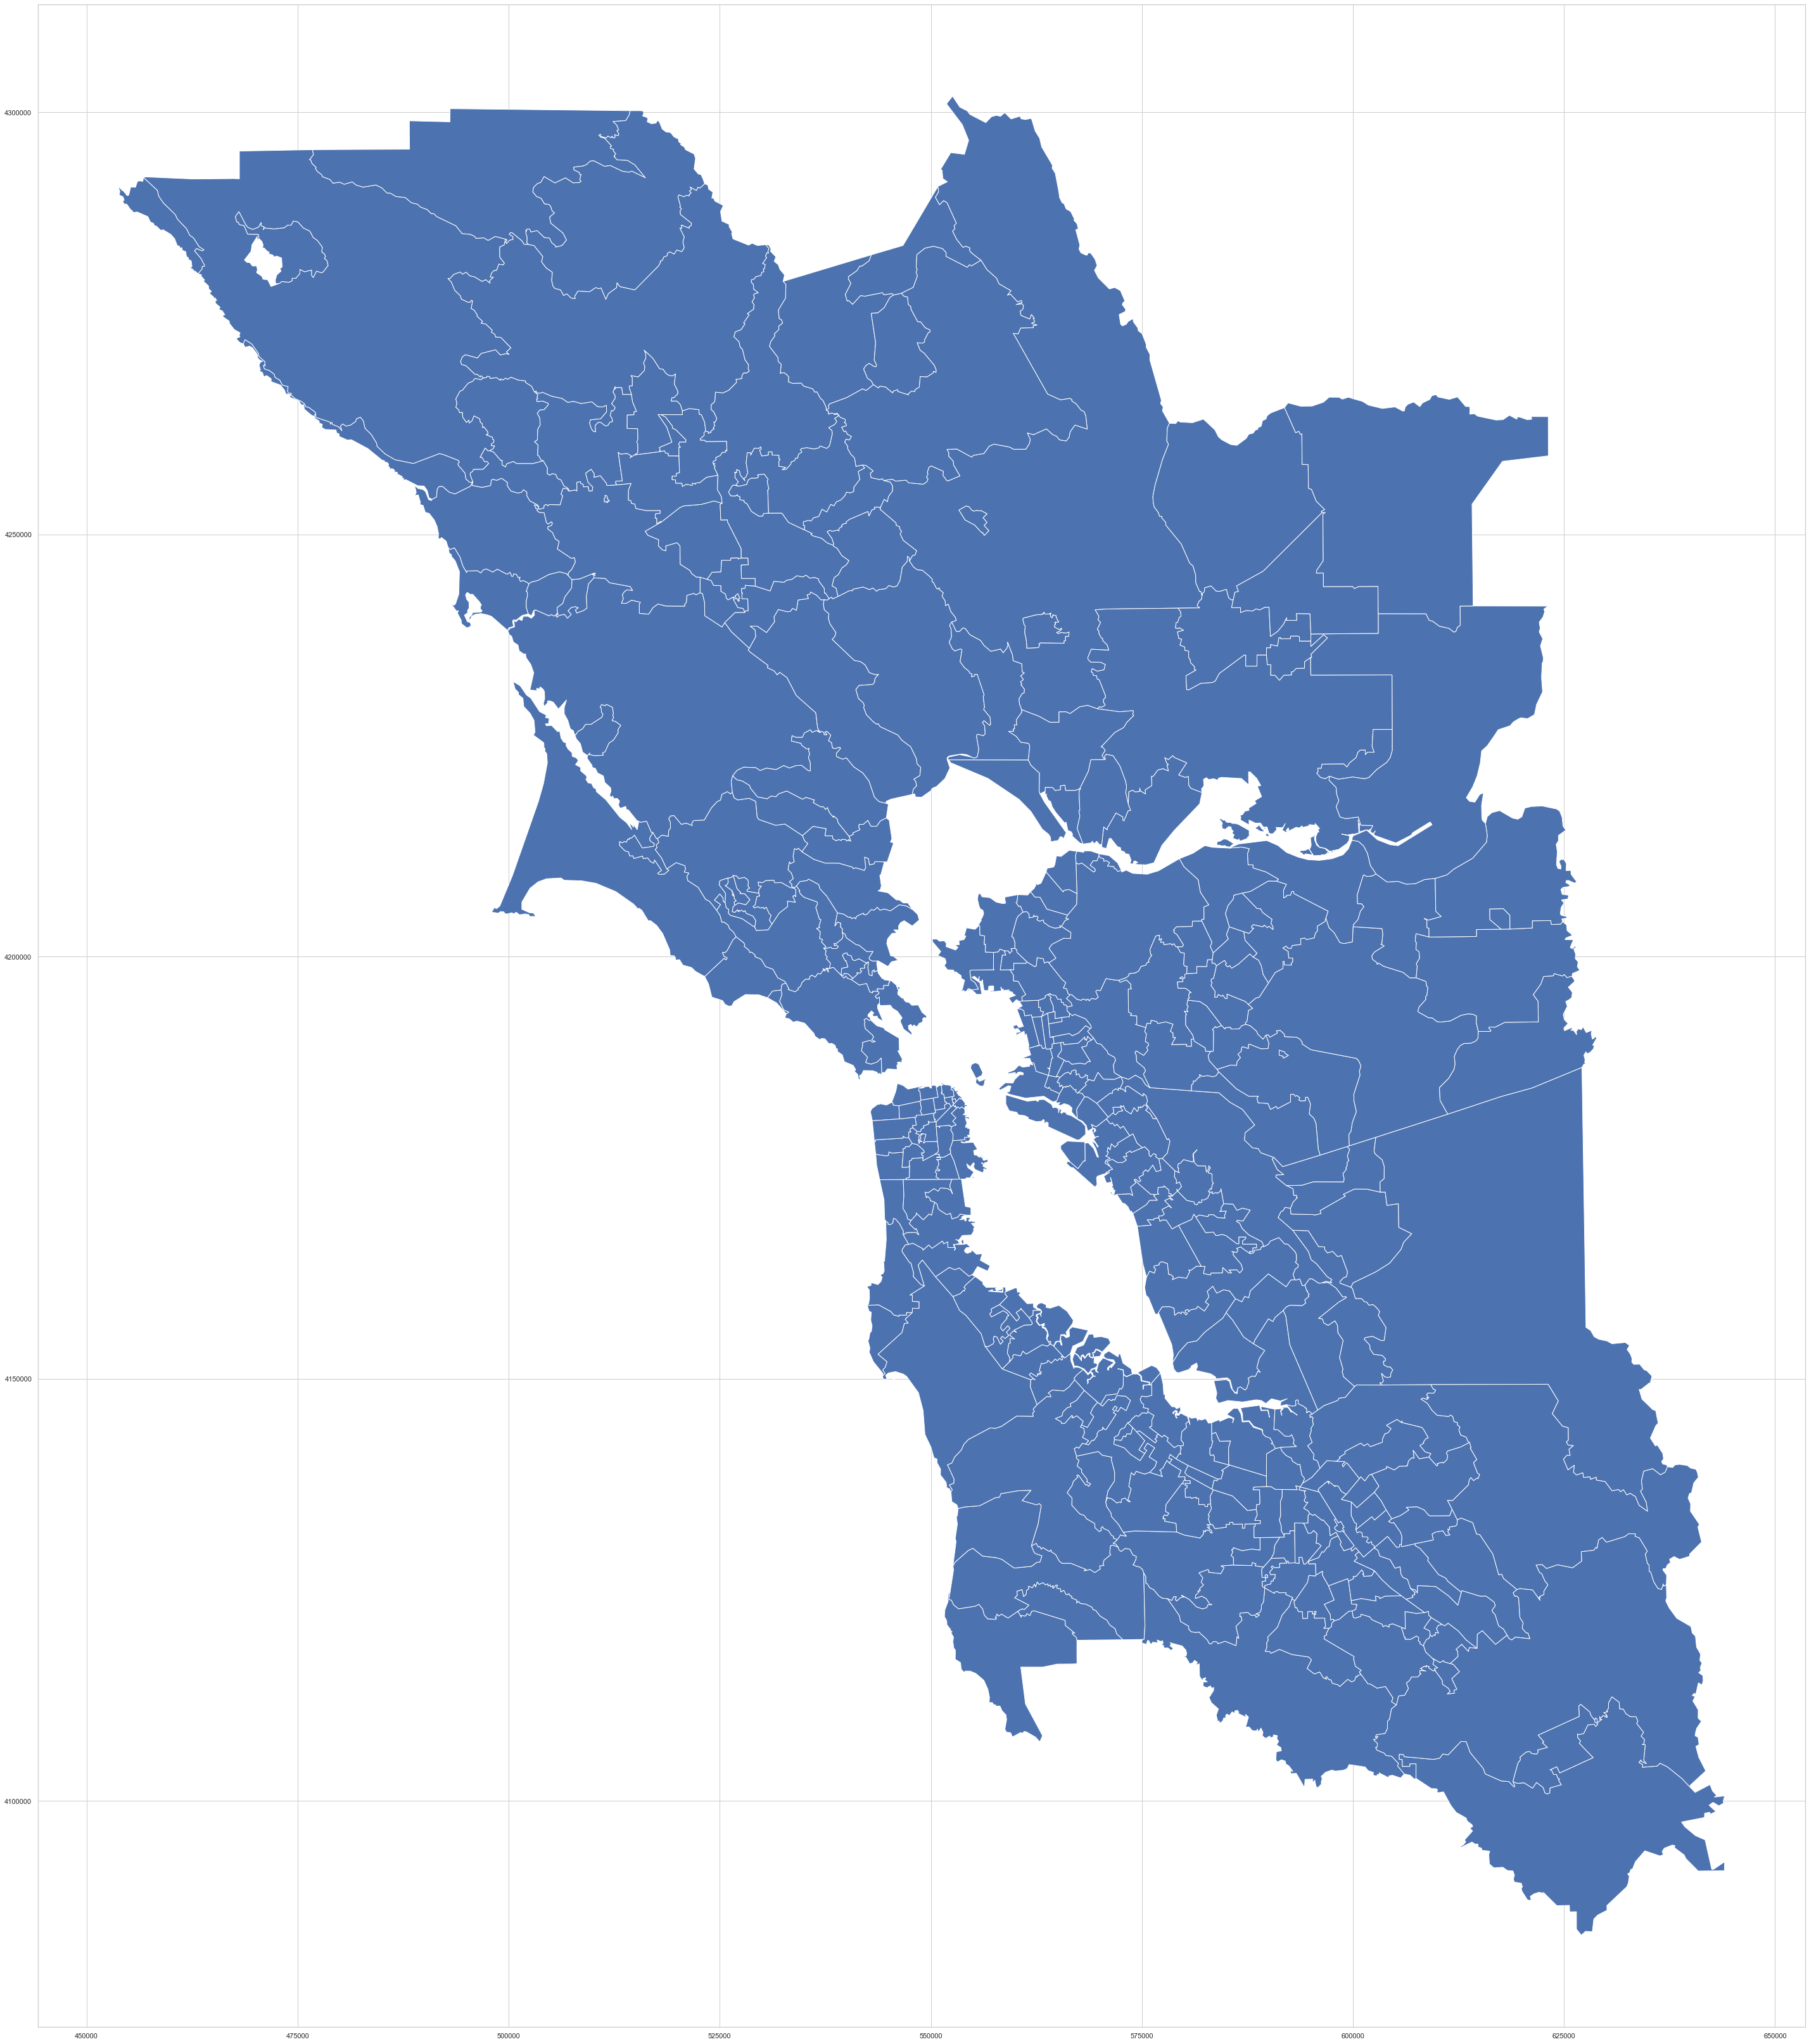

In [289]:
#Let's make a map!
import geopandas as gpd


#SF Bay Area shape file by city
#map_df = gpd.read_file(data_path + "ba_map/city/vj593xs7263.shp")

#SF Bay Area shape file by zip code
map_df = gpd.read_file(data_path + "ba_map/zipcode/ZIPCODE.shp")

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()
#merged = map_df.set_index('ZIP_CODE_5').join(redfin.set_index('ZIP OR POSTAL CODE'))
#merged.loc[merged['PO_NAME'] == 'CUPERTINO',:]
#merged
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# create map
#merged.plot(column='PRICE', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#merged.plot(column='PRICE', ax=ax, alpha=0.5, edgecolor='k', legend=True)

ValueError: zero-size array to reduction operation minimum which has no identity

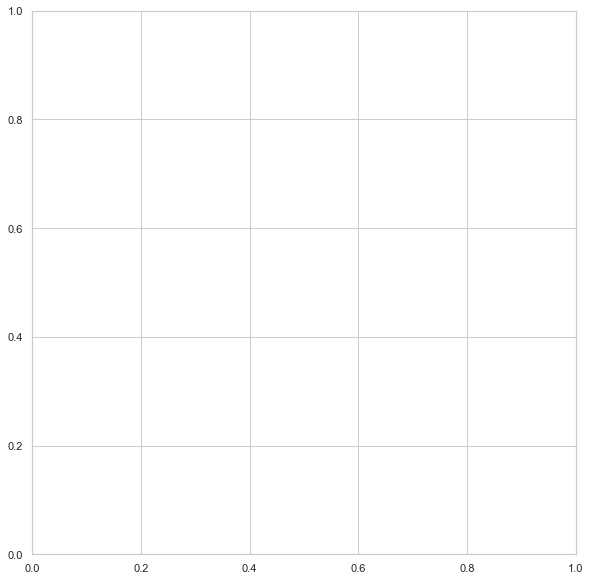

In [277]:
#Let's make a map!
import geopandas as gpd

redfin = redfin.loc[0:100,:]
map_df = gpd.read_file(data_path + "ba_map/bayarea_zipcodes.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df
#map_df.plot()
merged = map_df.set_index('ZIP').join(redfin.set_index('ZIP OR POSTAL CODE'))
#merged.head()

# set the range for the choroplethvmin
#vmax = 120, 220

#plt.figure(figsize=(16, 6))

# create figure and axes for Matplotlibfig
#ax = plt.subplots(1, figsize=(10, 6))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# create map
#merged.plot(column='PRICE', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged.plot(column='PRICE', ax=ax, alpha=0.5, edgecolor='k', legend=True)

AttributeError: module 'contextily' has no attribute 'add_basemap'

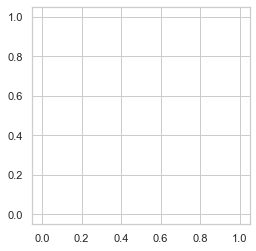

In [266]:

import contextily as ctx
merged = merged.to_crs(epsg=3857)
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#contextily.add_basemap(ax)
#plt.show()

# Dataframe you want to plot
gdf = gpd.GeoDataFrame(merged, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
ax = gdf.plot()

# choose any of the supported maps from ctx.sources
ctx.add_basemap(ax, url=ctx.sources.ST_TERRAIN)
ax.set_axis_off()
plt.show()